# SC1304 Tutorial: Supervised and Unsupervised Learning Practice Problems

Exercise 1: House Price Prediction using Linear Regression
Background
You work for a real estate company that wants to predict house prices based on various features. They have provided you with a dataset containing information about houses sold in the past year.

Data Description
The dataset contains the following features:

Square footage (sqft)
<br> Number of bedrooms (bedrooms)
<br> Number of bathrooms (bathrooms)
<br> Age of the house (years)
<br> Distance to nearest school (miles)
<br> Target variable: House price (price)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data (in real scenario, you would load your dataset)
np.random.seed(42)
n_samples = 1000

data = {
    'sqft': np.random.normal(2000, 500, n_samples),
    'bedrooms': np.random.randint(1, 6, n_samples),
    'bathrooms': np.random.randint(1, 4, n_samples),
    'age': np.random.randint(0, 50, n_samples),
    'distance_to_school': np.random.uniform(0, 5, n_samples)
}

# Create price with some relationship to features
data['price'] = (
    200 * data['sqft'] +
    50000 * data['bedrooms'] +
    75000 * data['bathrooms'] -
    2000 * data['age'] -
    25000 * data['distance_to_school'] +
    np.random.normal(0, 50000, n_samples)
)

df = pd.DataFrame(data)

In [ ]:
df.head()

,sqft,bedrooms,bathrooms,age,distance_to_school,price
0,2248.357077,4,3,32,0.071907,814393.216497
1,1930.867849,1,3,49,3.821767,493000.442970
2,2323.844269,3,1,37,3.118715,492004.731839
3,2761.514928,5,3,26,3.811513,936729.897273
4,1882.923313,3,3,33,0.194690,611025.858251


Questions to Exercise 1:
<br> a. Split the data into training (70%) and testing (30%) sets
<br> b. Train a linear regression model
<br> c. Make predictions on the test set
<br> d. Calculate and interpret the R² score and RMSE root mean square error
<br> e. Which features have the strongest influence on house prices?
<br> f. What are the assumptions of linear regression, and how can you verify them?

In [ ]:
#a)
# Separate features (X) and target variable (y)
X = df[['sqft', 'bedrooms', 'bathrooms', 'age', 'distance_to_school']]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 700
Testing set size: 300


In [ ]:
#b)
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#c)
y_pred = model.predict(X_test)
print(y_pred)
print(len(y_pred))

In [ ]:
#d)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: ${rmse:,.2f}")

R² Score: 0.9046
RMSE: $47,694.27


The R² score tells us the proportion of variance in the target variable that's predictable from the features. A score closer to 1.0 indicates better prediction quality. The RMSE gives us the average prediction error in the same units as our target variable (dollars in this case).

In [ ]:
#e)
# Create a DataFrame of features and their coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importance:
              Feature   Coefficient
2           bathrooms  76165.899869
1            bedrooms  50384.903780
0                sqft    194.906466
3                 age  -2108.870987
4  distance_to_school -25157.416268


The coefficients tell us how much the price changes for a one-unit increase in
each feature. Larger absolute values indicate stronger influence.


f. The key assumptions of linear regression are:

Linearity: The relationship between features and target should be linear
Independence: Observations should be independent of each other
Homoscedasticity: Constant variance in residuals
Normality: Residuals should be normally distributed
No multicollinearity: Features should not be highly correlated

To verify these assumptions, you can use these diagnostic plots:

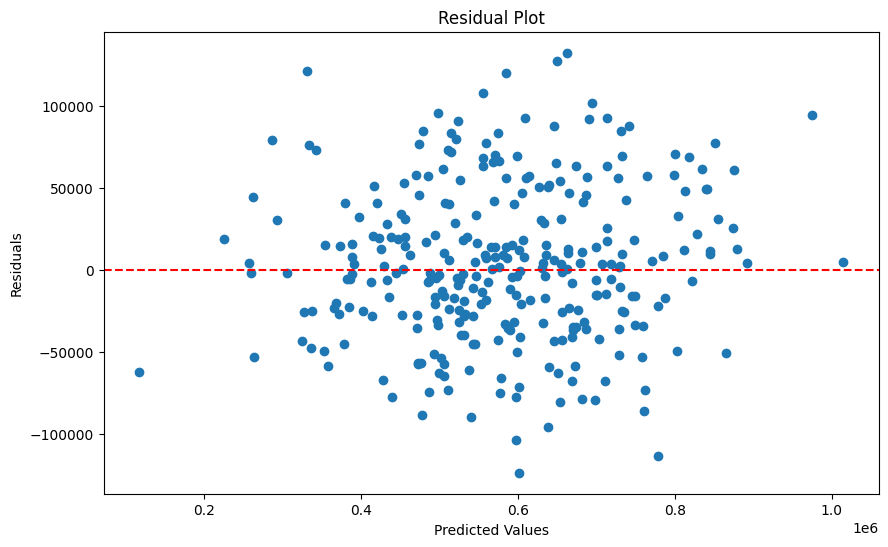

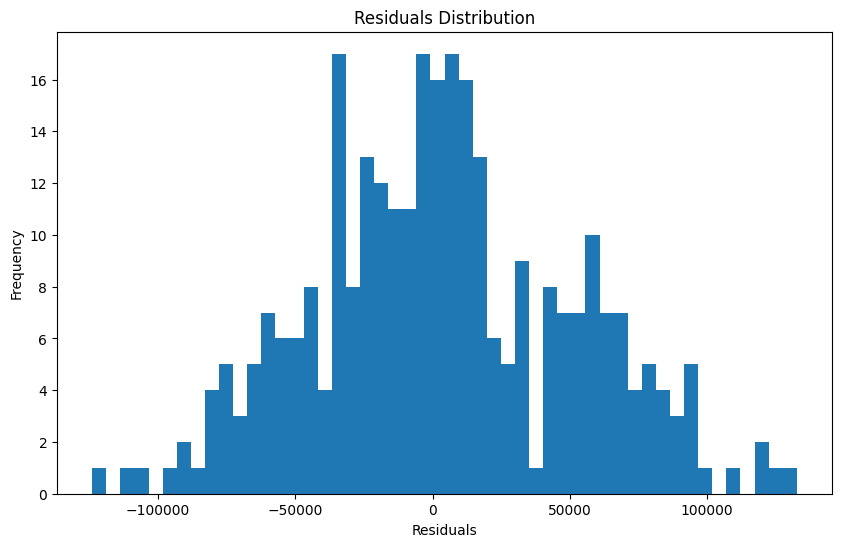

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# 1. Linearity and Homoscedasticity Check
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 2. Normality Check
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

# 3. Multicollinearity Check
correlation_matrix = X.corr()